In [16]:
import pandas as pd 

df = pd.read_csv('/Users/barbararuvolo/Desktop/sentiment_chatgpt.csv', usecols=['user_name', 'tweets', 'clean_tweets','user_description','label', 'date'])

In [17]:
## Processing a bit the raw tweets
import re
import string

# cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

# cleaning and removing mentions 
def remove_mentions(word):
    return re.sub(r"@\S+", "", word)

# cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

def preprocessing(df):
    # cleaning and removing URLs
    df = df.apply(lambda x: cleaning_URLs(x))
    df = df.apply(lambda x: remove_hyperlink(x))
    print("Cleaned and removed the URLs and hyperlinks.")
    
    # cleaning and removing repeating characters
    df = df.apply(lambda x: cleaning_repeating_char(x))
    print("Cleaned and removed the repeating characters.")
    
    return df

In [15]:
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis', 
                    model='arpanghoshal/EmoRoBERTa')

#emotion_labels = emotion("Thanks for using it.")
#print(emotion_labels)

2023-06-05 16:13:23.967696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to th

## Emotion analysis of first month

In [18]:
df_sorted = df.sort_values(by='date')

In [19]:
df_sorted # dates from 5.12 to 26.4 

,user_name,user_description,tweets,clean_tweets,label,date
357647,norman meuschke,postdoc gipplab unigoettingen phd unikonstanz ...,#ChatGPT and similar #LLM pose a challenge to ...,chatgpt similar llm pose challenge academic in...,neutral,2022-12-05 17:08:20+00:00
357646,devang,passionate nature software developer profession,Was just wondering is there any difference bet...,wondering difference jasper chatgpt gpt chatgp...,negativ,2022-12-05 17:08:44+00:00
357645,gabriel furstenheim,mathematician developer amazon previously geob...,Russel vs ChatGPT. It's also funny that it tak...,russel chatgpt it funny take long time answer ...,negativ,2022-12-05 17:09:04+00:00
357644,iamtmoyo,blockchain enthusiast philanthropist slave jav...,"Levels🙏🙏🙏,so happy for the chatGPT team for co...",levelsso happy chatgpt team com revolutionary ...,neutral,2022-12-05 17:10:31+00:00
357643,nenu,brain meant processing million tweet post vide...,"ChatGPT is the biggest, smartest brain 🧠 in th...",chatgpt biggest smartest brain world right now...,neutral,2022-12-05 17:11:10+00:00
...,...,...,...,...,...,...
5735,mjung,based,Impressive! I got the TEMU invitation code &lt...,impressive got temu invitation code chatgpt do...,positiv,2023-04-26 14:38:13+00:00
5734,gaynell,luv guy pls help click,Oh my gosh! ChatGPT is too powerful! It can to...,gosh chatgpt powerful told temu invitation cod...,negativ,2023-04-26 14:39:10+00:00
5733,vada,fluent simlish,Impressive! How does this chatGPT know everyth...,impressive chatgpt know everything gpt,neutral,2023-04-26 14:39:24+00:00
5732,jacquerodgers,devil detail,Shocking! Why chatGPT can know the latest shop...,shocking chatgpt know latest shopping app temu...,negativ,2023-04-26 14:40:11+00:00


In [20]:
df_sorted.date = pd.to_datetime(df_sorted.date)

In [21]:
first = df_sorted[df_sorted.date.dt.month == 12]

In [22]:
first

,user_name,user_description,tweets,clean_tweets,label,date
357647,norman meuschke,postdoc gipplab unigoettingen phd unikonstanz ...,#ChatGPT and similar #LLM pose a challenge to ...,chatgpt similar llm pose challenge academic in...,neutral,2022-12-05 17:08:20+00:00
357646,devang,passionate nature software developer profession,Was just wondering is there any difference bet...,wondering difference jasper chatgpt gpt chatgp...,negativ,2022-12-05 17:08:44+00:00
357645,gabriel furstenheim,mathematician developer amazon previously geob...,Russel vs ChatGPT. It's also funny that it tak...,russel chatgpt it funny take long time answer ...,negativ,2022-12-05 17:09:04+00:00
357644,iamtmoyo,blockchain enthusiast philanthropist slave jav...,"Levels🙏🙏🙏,so happy for the chatGPT team for co...",levelsso happy chatgpt team com revolutionary ...,neutral,2022-12-05 17:10:31+00:00
357643,nenu,brain meant processing million tweet post vide...,"ChatGPT is the biggest, smartest brain 🧠 in th...",chatgpt biggest smartest brain world right now...,neutral,2022-12-05 17:11:10+00:00
...,...,...,...,...,...,...
305315,lakejoco,inspired meme forager rambler,Podcast returns in 2023! 🐈🌙\n.\n#ai #chatgpt #...,podcast return chatgpt artificialintelligence ...,positiv,2022-12-31 23:56:28+00:00
305314,vinny carpenter,geek mission life strive seek find yield opini...,One of my new favorite thing to do with #ChatG...,new favorite thing chatgpt create playlist her...,positiv,2022-12-31 23:58:31+00:00
305313,kawtar choubari,content creator software engineer tweet progra...,Sounds like AI can't predict 2023 trends 😆\n#n...,sound like cant predict trend newyear chatgpt ...,positiv,2022-12-31 23:58:37+00:00
305312,yordan dimitrov,focusing seo techcharities more tweeting lates...,I asked #ChatGPT to write a #NYE Joke for SEOs...,asked chatgpt write nye joke seos delivered se...,positiv,2022-12-31 23:59:30+00:00


In [23]:
fpos = first[first.label == "positive"]

In [24]:
tweets = preprocessing(fpos.tweets)

Cleaned and removed the URLs and hyperlinks.
Cleaned and removed the repeating characters.


In [25]:
list(tweets)

['These opinions are not mine. The above criticism of "ChatGPT" was generated using  #ChatGPT 😅\n\nPrompt: "Let\'s assume you are a technology author who is critical of ChatGPT. Write a hypothetical tweet thread to show that? "',
 "We've all seen the extreme capabilities of #AI with #OpenAI's most recent product, #ChatGPT.\n\nBut did you know that in the not-too-distant future, AI could become indistinguishable from human beings?\n\nA short #thread 👇",
 "I wanted to give #ChatGPT a try but I guess I'll have to wait... \U0001fae4\U0001fae4  ",
 "Although it's still not up to the mark for critical thinking or some deep analytical tasks but the thing it's doing is unthinkable few years ago.. What a time to be alive. Deep learning especially transformers are rocking the AI world. 😄 #ChatGPT  ",
 'These threads on ChatGPT are getting more and more insane! #ai #ChatGPT  ',
 'Nice to know the new Artificial Intelligence Chatbot is a theist #ChatGPT  ',
 "Update: I can't get #ChatGPT to play #

In [26]:
emotion_labels = emotion("#ChatGPT develops it very well. I'm impressed.  ")
print(emotion_labels)

[{'label': 'admiration', 'score': 0.9927748441696167}]


In [32]:
emotion_labels[0]['label']

'admiration'

In [ ]:
emotions = []
for sentence in list(tweets):
    emotion_labels = emotion(sentence)
    emotions.append(emotion_labels[0]['label'])

I launched the script on Colab. I now import the results and work here

In [74]:
#load emotions data for the first month
import pandas as pd
df_fpos = pd.read_csv('/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/datasets/positive_emotions.csv')
df_fneg = pd.read_csv('/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/datasets/negative_emotions.csv')

In [75]:
df_fpos

,Unnamed: 0,0
0,0,neutral
1,1,curiosity
2,2,desire
3,3,realization
4,4,annoyance
...,...,...
17314,17314,neutral
17315,17315,love
17316,17316,disapproval
17317,17317,neutral


In [76]:
df_fneg

,label
0,curiosity
1,amusement
2,amusement
3,neutral
4,admiration
...,...
18247,surprise
18248,realization
18249,disappointment
18250,neutral


In [77]:
# change the column names
df_fpos.columns = ['tweet_index','emotion']
df_fneg.columns = ['emotion']


In [78]:
from collections import Counter

positive_emotions_counts = Counter(df_fpos.emotion)
negative_emotions_counts = Counter(df_fneg.emotion)

fmap = {}
print("Positive emotions for the first month:")
for string, count in positive_emotions_counts.items():
    fmap[string] = count

sorted_fpos = sorted(fmap.items(), key=lambda x: x[1])
sorted_fpos.reverse()

for a in sorted_fpos:
    print(a)

fmap = {}
print("Negative emotions for the first month:")
for string, count in negative_emotions_counts.items():
    fmap[string] = count

sorted_fneg = sorted(fmap.items(), key=lambda x: x[1])
sorted_fneg.reverse()

for a in sorted_fneg:
    print(a)

Positive emotions for the first month:
('neutral', 6732)
('approval', 1832)
('admiration', 1703)
('curiosity', 1637)
('realization', 1201)
('excitement', 457)
('confusion', 433)
('surprise', 382)
('joy', 361)
('gratitude', 358)
('optimism', 324)
('amusement', 310)
('disapproval', 286)
('caring', 273)
('annoyance', 198)
('love', 192)
('fear', 183)
('desire', 121)
('disappointment', 113)
('sadness', 57)
('anger', 51)
('disgust', 25)
('pride', 25)
('nervousness', 24)
('remorse', 15)
('embarrassment', 14)
('relief', 8)
('grief', 4)
Negative emotions for the first month:
('neutral', 9355)
('curiosity', 1733)
('approval', 1270)
('admiration', 1220)
('realization', 587)
('amusement', 449)
('confusion', 445)
('excitement', 444)
('gratitude', 370)
('joy', 330)
('disapproval', 301)
('surprise', 292)
('love', 211)
('caring', 185)
('fear', 184)
('disappointment', 157)
('annoyance', 154)
('desire', 124)
('optimism', 116)
('sadness', 113)
('anger', 80)
('disgust', 43)
('remorse', 37)
('relief', 19)


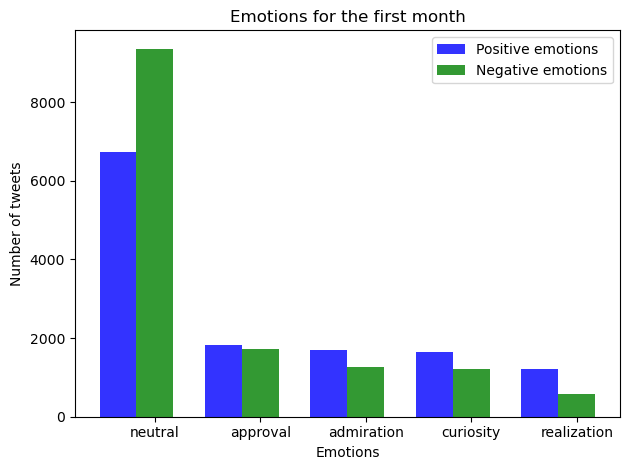

In [66]:
# plot results
import matplotlib.pyplot as plt
import numpy as np

# data to plot 
n_groups = 5
positive_emotions = (sorted_fpos[0][1], sorted_fpos[1][1], sorted_fpos[2][1], sorted_fpos[3][1], sorted_fpos[4][1])
negative_emotions = (sorted_fneg[0][1], sorted_fneg[1][1], sorted_fneg[2][1], sorted_fneg[3][1], sorted_fneg[4][1])

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, positive_emotions, bar_width,
alpha=opacity,
color='b',
label='Positive emotions')

rects2 = plt.bar(index + bar_width, negative_emotions, bar_width,
alpha=opacity,
color='g',
label='Negative emotions')

plt.xlabel('Emotions')
plt.ylabel('Number of tweets')
plt.title('Emotions for the first month')
plt.xticks(index + bar_width, (sorted_fpos[0][0], sorted_fpos[1][0], sorted_fpos[2][0], sorted_fpos[3][0], sorted_fpos[4][0]))
plt.legend()

plt.tight_layout()
plt.show()



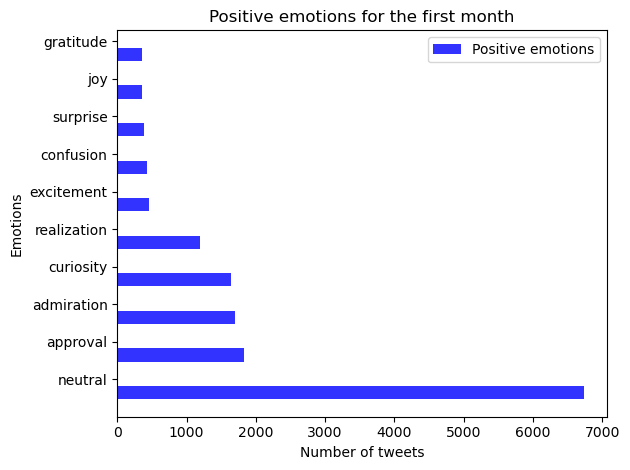

In [67]:
# plot positive emotions for the first month with horizontal bar chart
import matplotlib.pyplot as plt
import numpy as np

# data to plot of first 10 groups
n_groups = 10

positive_emotions = (sorted_fpos[0][1], sorted_fpos[1][1], sorted_fpos[2][1], sorted_fpos[3][1], sorted_fpos[4][1], sorted_fpos[5][1], sorted_fpos[6][1], sorted_fpos[7][1], sorted_fpos[8][1], sorted_fpos[9][1])

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.barh(index, positive_emotions, bar_width,
alpha=opacity,
color='b',
label='Positive emotions')

plt.xlabel('Number of tweets')
plt.ylabel('Emotions')
plt.title('Positive emotions for the first month')
plt.yticks(index + bar_width, (sorted_fpos[0][0], sorted_fpos[1][0], sorted_fpos[2][0], sorted_fpos[3][0], sorted_fpos[4][0], sorted_fpos[5][0], sorted_fpos[6][0], sorted_fpos[7][0], sorted_fpos[8][0], sorted_fpos[9][0]))
plt.legend()

plt.tight_layout()
plt.show()

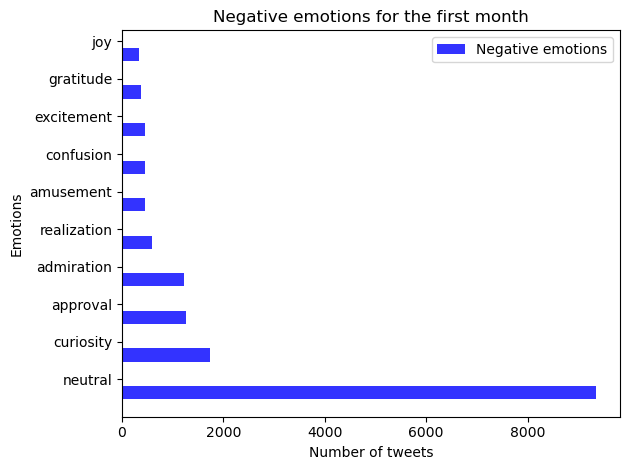

In [68]:
# plot negative emotions for the first month with horizontal bar chart
import matplotlib.pyplot as plt
import numpy as np

# data to plot of first 10 groups
n_groups = 10

negative_emotions = (sorted_fneg[0][1], sorted_fneg[1][1], sorted_fneg[2][1], sorted_fneg[3][1], sorted_fneg[4][1], sorted_fneg[5][1], sorted_fneg[6][1], sorted_fneg[7][1], sorted_fneg[8][1], sorted_fneg[9][1])

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.barh(index, negative_emotions, bar_width,
alpha=opacity,
color='b',
label='Negative emotions')

plt.xlabel('Number of tweets')
plt.ylabel('Emotions')
plt.title('Negative emotions for the first month')
plt.yticks(index + bar_width, (sorted_fneg[0][0], sorted_fneg[1][0], sorted_fneg[2][0], sorted_fneg[3][0], sorted_fneg[4][0], sorted_fneg[5][0], sorted_fneg[6][0], sorted_fneg[7][0], sorted_fneg[8][0], sorted_fneg[9][0]))
plt.legend()

plt.tight_layout()
plt.show()